# D. E. U. en Inteligencia Artificial de Samsung Innovation Campus (Exercises)

- Cèsar Ferri, `cferri@dsic.upv.es` (Introduction).
- Javier Palanca, `jpalanca@dsic.upv.es` y Salvador España, `sespana@dsic.upv.es` (Numpy, Pandas).
- Samuel Morillas `smorillas@mat.upv.es` y Víctor Ortiz `vsotomayor@mat.upv.es` (Math).
- Fernando Martínez `fmartinez@dsic.upv.es` (Machine Learning - Supervised/Unsupervised).
- Antonio Molina `amolina@upv.es` (Natural Language Processing).
- Carlos Monserrat `cmonserr@dsic.upv.es` (Deep Learning 1/2).
- **`Mayús` + `Tab`**: shows the help of the function, in addition to the `help()` function.
- **`Esc` -> `M`**: changes the cell to Markdown (**Y** to change to Code).
- **`Tab`**: **MUST BE USED**.

# Chapter 2. Math for Data Science

## 2. 1. Recommender algorithms

A recommendation system predicts the most suitable **items** for a **user**, with collaborative filtering relying on user interactions to make these predictions. These algorithms use user ratings or interactions to suggest items with the highest predicted preferences, as seen in platforms like Netflix, Spotify, and YouTube.  

The input typically consists of a user-item matrix capturing user interactions, which forms the basis for personalized recommendations.  

Collaborative filtering can be **user-user**, suggesting items based on what similar users liked, or **item-item**, recommending items similar to those a user has liked. The key is measuring **similarity**—often using cosine similarity—rather than vector length, to generate accurate recommendations.

In [3]:
import numpy as np
import numpy.linalg as la

# Recommendation exercise
M = np.array([[1, 0.385, 0.183],
              [0.192, 0.408, 0.333],
              [0.3, 3, 5]])
print('M:\n', M, sep='')
M_norm = M / la.norm(M, axis=0)        # Normalize COLUMNS
S = M_norm.T @ M_norm
print('Similarity matrix (normalized values):')
print(S)
print('Column0:', S[:, 0])
print('Biggest similarity for Column0 (not counting diagonal):', np.max(S[1:, 0]))
print('At position:', np.argmax(S[1:, 0])+1)
K = S @ M
print('Recommendation matrix:\n', K, sep='')

M:
[[1.    0.385 0.183]
 [0.192 0.408 0.333]
 [0.3   3.    5.   ]]
Similarity matrix (normalized values):
[[1.         0.42080701 0.32818656]
 [0.42080701 1.         0.99361804]
 [0.32818656 0.99361804 1.        ]]
Column0: [1.         0.42080701 0.32818656]
Biggest similarity for Column0 (not counting diagonal): 0.42080701478644983
At position: 1
Recommendation matrix:
[[1.17925092 1.54124895 1.96406154]
 [0.91089243 3.55086483 5.3780979 ]
 [0.81896123 3.53174799 5.39093295]]


## 2. 2.  Image compression

La clave para trabajar matemáticamente con imágenes es la siguiente: **una imagen en blanco y negro es una matriz** donde el valor de **cada entrada te determina la intensidad del píxel** correspondiente. Veamos un ejemplo de cómo transformar una imagen en color a blanco y negro, y posteriormente cómo transformarla en una matriz de este tipo.

Con los 100 primeros valores singulares ya podemos observar bastante bien la imagen original. Lo destacable es que para calcular esta aproximación solamente hemos necesitado conocer $100\cdot 4032+100\cdot3024+100$ valores (los de las primeras 100 columnas de $U$, los de las primeras 100 filas de $V$ y los $100$ primeros valores singulares), mientras que para la foto original necesitábamos conocer los $4032\cdot 3024$ valores de su matriz asociada. 

**¡Esto significa que solamente estamos utilizando el 
$\dfrac{100\cdot \:4032+100\cdot 3024+100}{4032\cdot \:3024}=5.78\%$
de la información original!**


**Ejercicio.** Calcular la aproximación 500 e indicar el porcentaje de información requerido (alrededor del 29%).


Para realizar una aproximación de una imagen en color podemos utilizar la misma idea, pero con las tres matrices asociadas a la imagen (RGB).

## 2. 3. Gradient Descent Method

### Ajuste (no lineal) por mínimos cuadrados: método del gradiente descendiente.

Cuando la nube de puntos que queremos aproximar no es lineal, o el número de datos es considerablemente grande, el ajuste lineal por el método de mínimos cuadrados no resulta efectivo...

Veamos un método alternativo: si nos fijamos, lo que tenemos es una nube de puntos $(x_i, y_i)$ con $i\geq 0$ posiblemente grande. En el caso de que quisiéramos ajustar esta nube de puntos por una función $y=f(x)$, entonces lo que queremos es minimizar el error cometido entre $y_i$ y nuestra predicción $\hat{y_i}=f(x_i)$. Hay varias maneras de medir el error cometido, como el _error cuadrático medio_, pero usaremos aquí simplemente el error cuadrático:

$$\sum_i (y_i-\hat{y_i})^2 = \sum_i (y_i-f(x_i))^2.$$

Luego tenemos que hallar el **mínimo de una función de varias variables**.

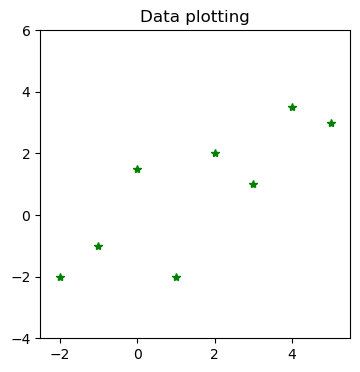

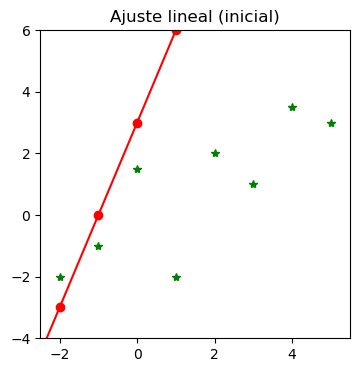

Éste es el error cuadrático (LINEAL): 595.5
Éste es el error cuadrático (1ª ITERACIÓN): 123.84599999999999
[[1.23]
 [2.46]]

Éste es el error cuadrático (FINAL): 11.572020714764747

Mejores valores: a = 0.7120318419618119, b = -0.3111667579545986.


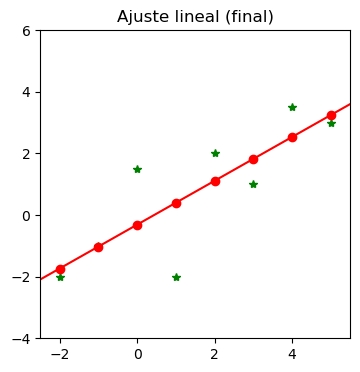

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

xi = np.array([-2, -1, 0, 1, 2, 3, 4, 5])
yi = np.array([-2, -1, 1.5, -2, 2, 1, 3.5, 3])
plt.figure(figsize=(4, 4)); plt.xlim(-2.5, 5.5); plt.ylim(-4, 6); plt.plot(xi, yi, '*g')
plt.title('Data plotting'); plt.show()

# Ajuste lineal
a, b = 3, 3
y_gorrito = a * xi + b
t = np.linspace(-2.5, 5.5, 1000)

plt.figure(figsize=(4, 4)); plt.xlim(-2.5, 5.5); plt.ylim(-4, 6)
plt.plot(xi, yi, '*g', xi, y_gorrito, 'or', t, a*t+b, 'r')
plt.title('Ajuste lineal (inicial)'); plt.show()

error1 = np.sum((yi - y_gorrito)**2)         # Error cometido 1
print('Éste es el error cuadrático (LINEAL):', error1)

# Método del Gradiente Descendiente (AJUSTE LINEAL)
xbarra = np.array([[3], [3]])
alpha = 0.005
gradiente = np.array([[np.sum(2 * (yi - (xbarra[0, 0]*xi + xbarra[1,0]))*(-xi))],
                      [np.sum(2 * (yi - (xbarra[0, 0]*xi + xbarra[1,0])) * (-1))]])

# Tener cuidado con CÓMO SE PONEN los valores, si por columna o fila [[]]
xbarra = xbarra - alpha * gradiente

# Error cometido
error = np.sum((yi - (xbarra[0, 0]*xi + xbarra[1,0]))**2)
# El error tiene que ser MÁS PEQUEÑO después de la primera iteración
print('Éste es el error cuadrático (1ª ITERACIÓN):', error)
print(xbarra, end='\n\n')

for i in range (100):
    gradiente = np.array([[np.sum(2 * (yi - (xbarra[0, 0]*xi + xbarra[1,0]))*(-xi))],
                       [np.sum(2 * (yi - (xbarra[0, 0]*xi + xbarra[1,0])) * (-1))]])
    xbarra = xbarra - alpha * gradiente

    # Error cometido
    error = np.sum((yi - (xbarra[0, 0]*xi + xbarra[1,0]))**2)
    # El error tiene que ser MÁS PEQUEÑO después de la primera iteración
    # print('Éste es el error cuadrático:', error)
print('Éste es el error cuadrático (FINAL):', error)
print(); print(f'Mejores valores: a = {xbarra[0][0]}, b = {xbarra[1][0]}.')

# Datos ajustados
plt.figure(figsize=(4, 4)); plt.xlim(-2.5, 5.5); plt.ylim(-4, 6)
plt.plot(t, xbarra[0, 0]*t + xbarra[1, 0], 'r-', xi, yi, '*g', xi, xbarra[0, 0]*xi + xbarra[1, 0], 'or')
plt.title('Ajuste lineal (final)'); plt.show()

[[ 0.70925583  1.        ]
 [-0.34334018  1.        ]
 [ 2.34687702  1.        ]
 ...
 [-0.55114543  1.        ]
 [-0.55825906  1.        ]
 [-1.88051271  1.        ]]

[-0.50096009 17.69741048]
-0.5009600899000541 17.697410480343926



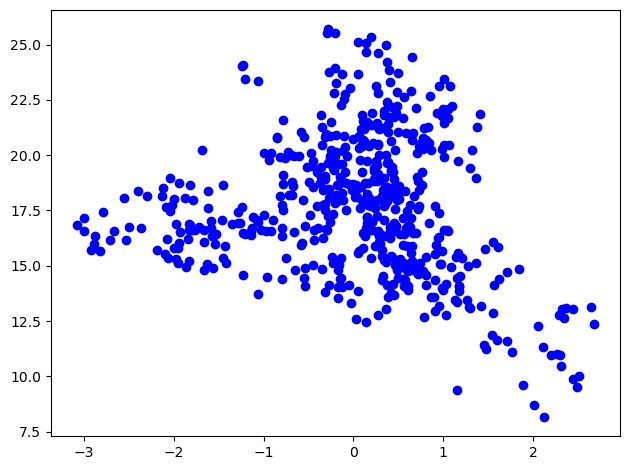

Error cuadrático de entrenamiento: 5198.707597142634
Error cuadrático medio (%) de entrenamiento: 9.316680281617623

Error cuadrático de validación: 5018.459337492802
Error cuadrático medio (%) de validación: 8.99365472668961

Diferencia relativa (dividir): 1.0359170509369682
Percentil: 66.1369918879792


In [8]:
# Modelo 3 (t = ap + b)
A = np.column_stack((p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(p_e), np.max(p_e), len(ones))
y_line = a * p_e + b 

print(a, b, end='\n\n')
plt.plot(p_e, t_e, 'ob')
plt.tight_layout()
plt.show()

t_ep = a * p_e + b
error_e3 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e3)
print('Error cuadrático medio (%) de entrenamiento:', error_e3 / len(ones), end='\n\n')

t_tp = a * p_t + b
error_t3 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t3)
print('Error cuadrático medio (%) de validación:', error_t3 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e3 / error_t3)
print('Percentil:', scipy.stats.f.cdf(error_e3 / error_t3, len(ones) - 1, len(ones) - 1) * 100)

## 2. 4. Model fitting and Evaluation (`data_temperature_pressure_humidity.csv`)

### 2. 5. 1. Data loading, normalizing, randomiziting and splitting

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('./CSV/data_temperature_pressure_humidity.csv', decimal=',', sep=';')
display(df.head(df.size))

t = np.array(df.Temperature.values)
h = np.array(df.Humidity.values)     # Normalizar
p = np.array(df.Pressure.values)     # Normalizar

h_norm = (h - h.mean()) / h.std()    # Normalizados
p_norm = (p - p.mean()) / p.std()    # Normalizados

AA = np.stack((h_norm, p_norm, t), axis=1)         # Creación de matrices
print(AA)

# Barajar los índices de las filas
np.random.seed(50)
indices = np.random.permutation(AA.shape[0])
# Mitad del tamaño
mitad = AA.shape[0] // 2
# Primera mitad (bloque 1) y segunda mitad (bloque 2)
AA_e = AA[indices[:mitad]]
AA_t = AA[indices[mitad:]]

print("\nBloque entrenamiento (A_e):\n", AA_e)
print("\nBloque test (A_t):\n", AA_t)

h_e = AA_e[:, 0]
h_t = AA_t[:, 0]
p_e = AA_e[:, 1]
p_t = AA_t[:, 1]
t_e = AA_e[:, 2]
t_t = AA_t[:, 2]
ones = np.ones_like(h_e)

,Humidity,Pressure,Temperature
0,0.006993,1018.41577,8.393457
1,0.006736,1019.81128,8.620356
2,0.006697,1021.31366,9.361292
3,0.006370,1022.71802,10.435968
4,0.006117,1023.69019,11.233515
...,...,...,...
1111,0.005167,1010.14575,14.628382
1112,0.005631,1010.70276,13.815973
1113,0.006095,1011.71454,13.298029
1114,0.006099,1012.48877,12.857996


[[-1.10649869  0.75121222  8.39345741]
 [-1.22462443  0.94438465  8.62035561]
 [-1.24224913  1.15235048  9.36129189]
 ...
 [-1.51902468 -0.17640053 13.2980289 ]
 [-1.51696459 -0.06922832 12.857996  ]
 [-1.51257437  0.03812107 12.5229435 ]]

Bloque entrenamiento (A_e):
 [[-8.14311919e-01  7.09255831e-01  2.01212101e+01]
 [-1.07306660e-02 -3.43340177e-01  1.62708073e+01]
 [-1.23898264e+00  2.34687702e+00  1.26142826e+01]
 ...
 [-2.83286972e-03 -5.51145433e-01  2.08164005e+01]
 [-8.42754180e-01 -5.58259055e-01  1.79612370e+01]
 [ 3.69574538e-01 -1.88051271e+00  1.80863285e+01]]

Bloque test (A_t):
 [[ 0.96227205 -0.26821318 20.5692387 ]
 [ 1.52058351 -0.31549199 24.9744205 ]
 [ 0.27847297 -1.55353773 16.7170048 ]
 ...
 [ 0.14194185  0.57931422 14.085413  ]
 [-0.40793269 -0.63103561 15.1970463 ]
 [-1.15866511  0.420208   14.6859989 ]]


### 2. 5. 2. Model 1 ($t = ah + bp + c$)

[[-0.81431192  0.70925583  1.        ]
 [-0.01073067 -0.34334018  1.        ]
 [-1.23898264  2.34687702  1.        ]
 ...
 [-0.00283287 -0.55114543  1.        ]
 [-0.84275418 -0.55825906  1.        ]
 [ 0.36957454 -1.88051271  1.        ]]

[ 1.92116743 -0.05355636 17.64302737]


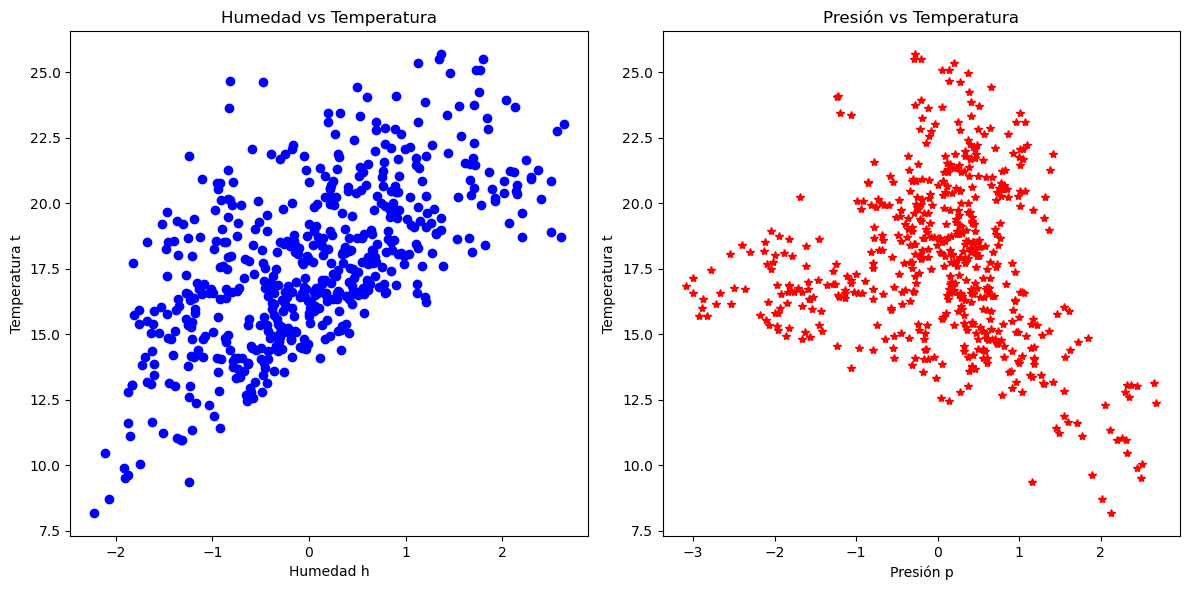

1.9211674323644399 -0.05355635764531652 17.643027372108733

Error cuadrático de entrenamiento: 3243.3223227418835
Error cuadrático medio (%) de entrenamiento: 5.812405596311619

Error cuadrático de validación: 3404.605838414966
Error cuadrático medio (%) de validación: 6.10144415486553

Diferencia relativa (dividir): 0.9526278449466065
Percentil: 28.35252219910474


In [15]:
# Modelo 1 (t = ah + bp + c)
A = np.column_stack((h_e, p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(h_e), np.min(p_e)]), np.max([np.max(h_e), np.max(p_e)]), 1000)
y_line = a * h_e + b * p_e + c

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Humedad vs Temperatura
ax1.set(xlabel="Humedad h", ylabel="Temperatura t", title="Humedad vs Temperatura")
ax1.plot(h_e, t_e, 'ob')
# Gráfico 2: Presión vs Temperatura
ax2.set(xlabel="Presión p", ylabel="Temperatura t", title="Presión vs Temperatura")
ax2.plot(p_e, t_e, '*r')

plt.tight_layout()
plt.show()

print(a, b, c, end='\n\n')

t_ep = a * h_e + b * p_e + c
error_e1 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e1)
print('Error cuadrático medio (%) de entrenamiento:', error_e1 / len(ones), end='\n\n')

t_tp = a * h_t + b * p_t + c
error_t1 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t1 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e1 / error_t1)
print('Percentil:', scipy.stats.f.cdf(error_e1 / error_t1, len(ones) - 1, len(ones) - 1) * 100)

### 2. 5. 3. Model 2 ($t = ah + b$)

[[-0.81431192  1.        ]
 [-0.01073067  1.        ]
 [-1.23898264  1.        ]
 ...
 [-0.00283287  1.        ]
 [-0.84275418  1.        ]
 [ 0.36957454  1.        ]]

[ 1.93447737 17.64125605]
1.9344773742091261 17.641256047804802



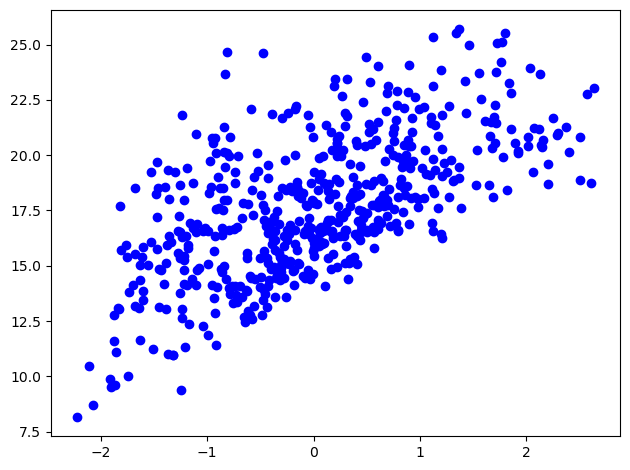

Error cuadrático de entrenamiento: 3244.9439637292917
Error cuadrático medio (%) de entrenamiento: 5.81531176295572

Error cuadrático de validación: 3407.9376671630707
Error cuadrático medio (%) de validación: 6.107415174127367

Diferencia relativa (dividir): 0.9521723343110724
Percentil: 28.161810468150243


In [17]:
# Modelo 2 (t = ah + b)
A = np.column_stack((h_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(h_e), np.max(h_e), len(ones))
y_line = a * h_e + b 

print(a, b, end='\n\n')
plt.plot(h_e, t_e, 'ob')
plt.tight_layout()
plt.show()

t_ep = a * h_e + b
error_e2 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e2)
print('Error cuadrático medio (%) de entrenamiento:', error_e2 / len(ones), end='\n\n')

t_tp = a * h_t + b
error_t2 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t2)
print('Error cuadrático medio (%) de validación:', error_t2 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e2 / error_t2)
print('Percentil:', scipy.stats.f.cdf(error_e2 / error_t2, len(ones) - 1, len(ones) -1 ) * 100)

### 2. 5. 4. Model 3 ($t = ap + b$)

[[ 0.70925583  1.        ]
 [-0.34334018  1.        ]
 [ 2.34687702  1.        ]
 ...
 [-0.55114543  1.        ]
 [-0.55825906  1.        ]
 [-1.88051271  1.        ]]

[-0.50096009 17.69741048]
-0.5009600899000541 17.697410480343926



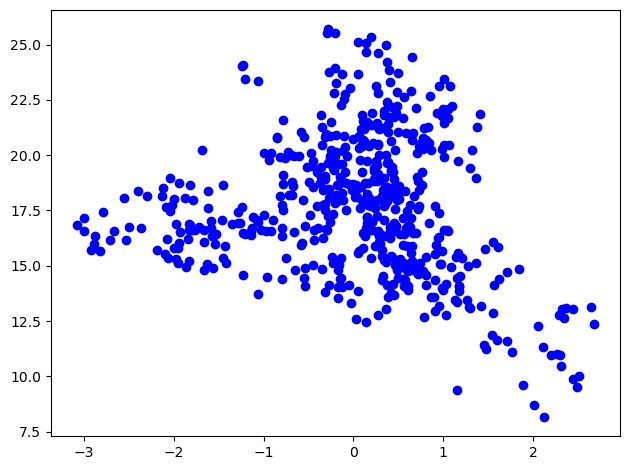

Error cuadrático de entrenamiento: 5198.707597142634
Error cuadrático medio (%) de entrenamiento: 9.316680281617623

Error cuadrático de validación: 5018.459337492802
Error cuadrático medio (%) de validación: 8.99365472668961

Diferencia relativa (dividir): 1.0359170509369682
Percentil: 66.1369918879792


In [18]:
# Modelo 3 (t = ap + b)
A = np.column_stack((p_e, ones))

print(A, end='\n\n')

resultado = np.linalg.inv(A.T @ A) @ A.T @ t_e
print(resultado)

# Coeficientes de la recta utilizando el resultado dado
a, b = resultado
# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min(p_e), np.max(p_e), len(ones))
y_line = a * p_e + b 

print(a, b, end='\n\n')
plt.plot(p_e, t_e, 'ob')
plt.tight_layout()
plt.show()

t_ep = a * p_e + b
error_e3 = (t_e - t_ep) @ (t_e - t_ep).T 
print('Error cuadrático de entrenamiento:', error_e3)
print('Error cuadrático medio (%) de entrenamiento:', error_e3 / len(ones), end='\n\n')

t_tp = a * p_t + b
error_t3 = (t_t - t_tp) @ (t_t - t_tp).T 
print('Error cuadrático de validación:', error_t3)
print('Error cuadrático medio (%) de validación:', error_t3 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e3 / error_t3)
print('Percentil:', scipy.stats.f.cdf(error_e3 / error_t3, len(ones) - 1, len(ones) - 1) * 100)

### 2. 5. 5. Search for statistical differences

In [19]:
print('Percentil entre validación de modelos 1 y 2:', scipy.stats.f.cdf(error_t1 / error_t2, len(ones) - 1, len(ones) - 1) * 100)
# Si sale cerca del 50%, son similares
# Si sale muy alto o muy bajo, HAY diferenciar significativas entre los modelos (2.5-97.5)
print('Percentil entre validación de modelos 1 y 3:', scipy.stats.f.cdf(error_t1 / error_t3, len(ones) - 1, len(ones) - 1) * 100)

Percentil entre validación de modelos 1 y 2: 49.53973652574565
Percentil entre validación de modelos 1 y 3: 0.0002530890306973612


## 2. 5. Model fitting and Evaluation (`life_expectancy_limpio.csv`)

### 2. 5. 1. Data loading, normalizing, randomizing and splitting

In [20]:
# A^-1 no es la inversa, utilizar inv()
# Ruta de csv: ../CSV/

# ¿QUÉ VARIABLE ES MÁS IMPORTANTE?
# ¿LA EDUCACIÓN ES PRESCINDIBLE?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('./CSV/life_expectancy_limpio.csv', sep=';', decimal=',')
display(df.head())

le = np.array(df['Life Expectancy World Bank'].values)    # Normalizar
co = np.array(df['CO2'].values)                           # Normalizar
he = np.array(df['Health Expenditure %'].values)          # Normalizar
ee = np.array(df['Education Expenditure %'].values)       # Normalizar

le_norm = (le - le.mean()) / le.std()                     # Normalizados
co_norm = (co - co.mean()) / co.std()                     # Normalizados

AA = np.stack((co, he, ee, le), axis=1)                   # Creación de matrices
print(AA)

# Barajar los índices de las filas
np.random.seed(40)
indices = np.random.permutation(AA.shape[0])
# Mitad del tamaño
mitad = AA.shape[0] // 2
# Primera mitad (bloque 1) y segunda mitad (bloque 2)
AA_e = AA[indices[:mitad]]
AA_t = AA[indices[mitad:]]

print("\nBloque entrenamiento (A_e):\n", AA_e)
print("\nBloque test (A_t):\n", AA_t)

co_e = AA_e[:, 0]
co_t = AA_t[:, 0]
he_e = AA_e[:, 1]
he_t = AA_t[:, 1]
ee_e = AA_e[:, 2]
ee_t = AA_t[:, 2]
le_e = AA_e[:, 3]
le_t = AA_t[:, 3]
ones = np.ones_like(le_e)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Injuries,Communicable,NonCommunicable
0,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2003,63.359,11.2,70.000000,12.617824,3.24693,16.360001,3268.34,36798.71,24566.31
1,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2005,64.659,9.0,79.999998,11.516304,4.85645,16.469999,3303.50,35858.70,24876.27
2,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2002,62.687,12.8,59.999999,10.662792,2.72058,17.629999,3781.09,36011.64,25804.54
3,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2004,64.020,9.8,70.000000,11.869797,3.23471,16.120001,3888.15,33050.62,26464.67
4,Sao Tome and Principe,STP,Sub-Saharan Africa,Lower middle income,2006,65.270,9.0,79.999998,8.276708,4.27118,16.650000,3832.71,31177.03,26649.59


[[7.00000003e+01 1.26178236e+01 3.24692988e+00 6.33590000e+01]
 [7.99999982e+01 1.15163040e+01 4.85645008e+00 6.46590000e+01]
 [5.99999987e+01 1.06627922e+01 2.72058010e+00 6.26870000e+01]
 ...
 [1.00960098e+07 5.06592178e+00 3.66744995e+00 7.64700000e+01]
 [1.05029297e+07 5.16790485e+00 3.54249000e+00 7.67040000e+01]
 [1.07072197e+07 5.35027790e+00 3.53999996e+00 7.69120000e+01]]

Bloque entrenamiento (A_e):
 [[2.16800003e+04 5.88520575e+00 2.49751997e+00 7.25230000e+01]
 [6.29999995e+02 6.37864399e+00 5.81677008e+00 4.33720000e+01]
 [6.35200005e+04 5.23467541e+00 5.11831570e+00 7.62180000e+01]
 ...
 [3.65000009e+03 4.11143351e+00 3.80152011e+00 5.75090000e+01]
 [4.91199989e+04 7.26602364e+00 4.08121014e+00 7.68940000e+01]
 [1.40000001e+02 4.32168341e+00 5.60338020e+00 6.98690000e+01]]

Bloque test (A_t):
 [[7.60599976e+04 7.11508703e+00 5.67253017e+00 8.17048781e+01]
 [4.98699989e+04 9.73071671e+00 5.12333012e+00 8.04707317e+01]
 [1.30200005e+04 5.84418154e+00 4.82572985e+00 7.105609

### 2. 5. 2. Model 1 ($le = a*co + b*he + c*ee + d$)

1.7204307797671844e-06 1.0606702925621994 0.9147755259850087 59.42583751988373
La variable más importante es:  1.0606702925621994 El término independiente no se cuenta



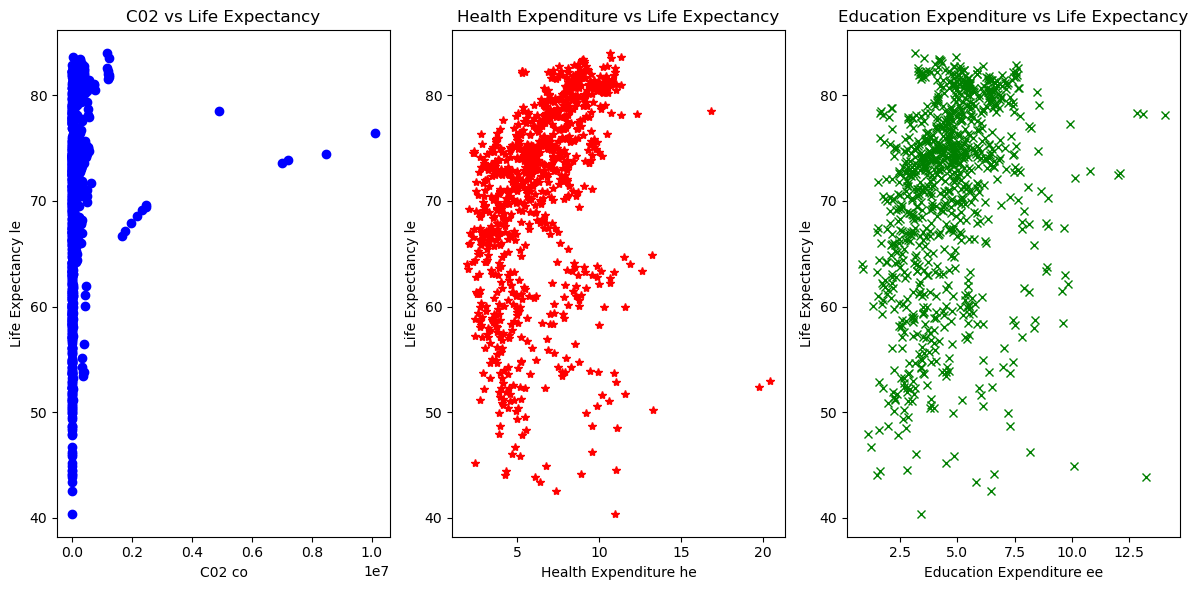

Error cuadrático de entrenamiento: 69.98211432697268
Error cuadrático medio (%) de entrenamiento: 0.07524958529782008

Error cuadrático de validación: 69.60692033216101
Error cuadrático medio (%) de validación: 0.07484615089479678

Diferencia relativa (dividir): 1.0053901823701044
Percentil: 53.263781578569514


In [24]:
# Modelo 1 (le = a*co + b*he + c*ee + d)
A = np.column_stack((co_e, he_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c, d = resultado
print(a, b, c, d)
print('La variable más importante es: ', np.max(np.abs([a, b, c])), 'El término independiente no se cuenta', end='\n\n')

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(co_e), np.min(he_e), np.min(ee_e)]), np.max([np.max(co_e), np.max(he_e), np.max(ee_e)]), 1000)
y_line = a * co_e + b * he_e + c * ee_e + d

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Gráfico 1: Humedad vs Temperatura
ax1.set(xlabel="C02 co", ylabel="Life Expectancy le", title="C02 vs Life Expectancy")
ax1.plot(co_e, le_e, 'ob')
# Gráfico 2: Presión vs Temperatura
ax2.set(xlabel="Health Expenditure he", ylabel="Life Expectancy le", title="Health Expenditure vs Life Expectancy")
ax2.plot(he_e, le_e, '*r')
# Gráfico 2: Presión vs Temperatura
ax3.set(xlabel="Education Expenditure ee", ylabel="Life Expectancy le", title="Education Expenditure vs Life Expectancy")
ax3.plot(ee_e, le_e, 'xg')

plt.tight_layout()
plt.show()

le_ep = a * co_e + b * he_e + c * ee_e + d
error_e1 = np.sum((le_e - le_ep)**2) / len(le_e)  
print('Error cuadrático de entrenamiento:', error_e1)
print('Error cuadrático medio (%) de entrenamiento:', error_e1 / len(ones), end='\n\n')

le_tp = a * co_t + b * he_t + c * ee_t + d
error_t1 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t1 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e1 / error_t1)
print('Percentil:', scipy.stats.f.cdf(error_e1 / error_t1, len(ones) - 1, len(ones) - 1) * 100)

### 2. 5. 3. Model 2 ($le = a*he + b*ee + c$)

In [25]:
# Modelo 2 (le = a*he + b*ee + c)
A = np.column_stack((he_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)
print('La variable más importante es: ', np.max(np.abs([a, b, c])), end='\n\n')

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(he_e), np.min(ee_e)]), np.max([np.max(he_e), np.max(ee_e)]), 1000)
y_line = a * he_e + b * ee_e + c

print(a, b, c, end='\n\n')

le_ep = a * he_e + b * ee_e + c
error_e2 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e2)
print('Error cuadrático medio (%) de entrenamiento:', error_e2 / len(ones), end='\n\n')

le_tp = a * he_t + b * ee_t + c
error_t2 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t2)
print('Error cuadrático medio (%) de validación:', error_t2 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e2 / error_t2)
print('Percentil:', scipy.stats.f.cdf(error_e2 / error_t2, len(ones) - 1, len(ones) - 1) * 100)

1.0648046180373427 0.890511870292487 59.74893411937548
La variable más importante es:  59.74893411937548

1.0648046180373427 0.890511870292487 59.74893411937548

Error cuadrático de entrenamiento: 71.0736106757625
Error cuadrático medio (%) de entrenamiento: 0.07642323728576612

Error cuadrático de validación: 69.99057423559648
Error cuadrático medio (%) de validación: 0.07525868197375966

Diferencia relativa (dividir): 1.0154740327821912
Percentil: 59.24882364239497


### 2. 5. 4. Model 3 ($le = a*co + b*he + c$)

In [26]:
# Modelo 3 (le = a*co + b*he + c)
A = np.column_stack((co_e, he_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e
# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(he_e), np.min(co_e)]), np.max([np.max(he_e), np.max(co_e)]), 1000)
y_line = a * co_e + b * he_e + c

print(a, b, c, end='\n\n')

le_ep = a * co_e + b * he_e + c
error_e3 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e3)
print('Error cuadrático medio (%) de entrenamiento:', error_e3 / len(ones), end='\n\n')

le_tp = a * co_t + b * he_t + c
error_t3 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t1)
print('Error cuadrático medio (%) de validación:', error_t3 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e3 / error_t3)
print('Percentil:', scipy.stats.f.cdf(error_e3 / error_t3, len(ones) - 1, len(ones) - 1) * 100, end='\n\n')

1.6173181750796733e-06 1.2382065574448569 62.500553424902705
1.6173181750796733e-06 1.2382065574448569 62.500553424902705

Error cuadrático de entrenamiento: 72.44846680260711
Error cuadrático medio (%) de entrenamiento: 0.07790157720710443

Error cuadrático de validación: 69.60692033216101
Error cuadrático medio (%) de validación: 0.07426151740601275

Diferencia relativa (dividir): 1.049016771111614
Percentil: 76.70118996455881



### 2. 5. 5. Model 4 ($le = a*co + b*ee + c$)

In [27]:
# Modelo 4 (le = a*co + b*ee + c)
A = np.column_stack((co_e, ee_e, ones))
resultado = np.linalg.inv(A.T @ A) @ A.T @ le_e

# Coeficientes de la recta utilizando el resultado dado
a, b, c = resultado
print(a, b, c)

# Generar la línea (puedes usar un rango más fino para que se vea continua)
x_line = np.linspace(np.min([np.min(ee_e), np.min(co_e)]), np.max([np.max(ee_e), np.max(co_e)]), 1000)
y_line = a * co_e + b * ee_e + c

print(a, b, c, end='\n\n')

le_ep = a * co_e + b * ee_e + c
error_e4 = np.sum((le_e - le_ep)**2) / len(le_e) 
print('Error cuadrático de entrenamiento:', error_e4)
print('Error cuadrático medio (%) de entrenamiento:', error_e4 / len(ones), end='\n\n')

le_tp = a * co_t + b * ee_t + c
error_t4 = np.sum((le_t - le_tp)**2) / len(le_t) 
print('Error cuadrático de validación:', error_t4)
print('Error cuadrático medio (%) de validación:', error_t4 / len(ones), end='\n\n')

print('Diferencia relativa (dividir):', error_e4 / error_t4)
print('Percentil:', scipy.stats.f.cdf(error_e4 / error_t4, len(ones) - 1, len(ones) - 1) * 100, end='\n\n')

1.7589038299971395e-06 1.3035372610583873 64.34708529644612
1.7589038299971395e-06 1.3035372610583873 64.34708529644612

Error cuadrático de entrenamiento: 76.24417750212238
Error cuadrático medio (%) de entrenamiento: 0.08198298656142192

Error cuadrático de validación: 78.1945917811283
Error cuadrático medio (%) de validación: 0.08408020621626698

Diferencia relativa (dividir): 0.9750569158994365
Percentil: 35.017842897052084



### 2. 5. 6. Search for statistical differences

In [28]:
print('Percentil entre validación de modelos 1 y 2 (drop co):', scipy.stats.f.cdf(error_t1 / error_t2, len(ones) - 1, len(ones) - 1) * 100)
print('Percentil entre validación de modelos 1 y 3 (drop ee):', scipy.stats.f.cdf(error_t1 / error_t3, len(ones) - 1, len(ones) - 1) * 100)
print('Percentil entre validación de modelos 1 y 4 (drop he):', scipy.stats.f.cdf(error_t1 / error_t4, len(ones) - 1, len(ones) - 1) * 100)
print('''Dejar caer co o ee no muestra diferencias significativas.
Dejar caer he hace que el modelo empeore MUCHO, corroborando con que he era la VARIABLE MÁS IMPORTANTE
''')

Percentil entre validación de modelos 1 y 2 (drop co): 46.6629978698527
Percentil entre validación de modelos 1 y 3 (drop ee): 54.75504038769665
Percentil entre validación de modelos 1 y 4 (drop he): 3.8200361194301986
Dejar caer co o ee no muestra diferencias significativas.
Dejar caer he hace que el modelo empeore MUCHO, corroborando con que he era la VARIABLE MÁS IMPORTANTE



# Chapter 3. Numpy and Pandas (Optimized Numerical Computation)

## Unit 1. Numpy Array Data Structure for Optimal Computational Performance

In [160]:
import numpy as np

x = np.arange(1, 7)
print(x)
print(x.reshape(2, -1))
print(x.reshape(3, -1), end="\n\n")

# Forma de inicializar el generador de números semi-aleatorios (pues al final no son tan aleatorios)
np.random.seed(125)

np.random.randint(10)                      # Genera número random de 0 a 10
np.random.randint(5, 10)                   # Genera número random de 5 a 10
np.random.randint(4, 10, size=(3, 2))      # Genera un array de números de 4 a 10, de 3 elementos en 2 dimensiones
np.random.randint(1, 11, size=1000)        # Genera un array de 1000 elementos aleatorios

A = np.arange(4).reshape(2, 2)             # One-line matrix array creation
print("A = ", A)
B = np.arange(3, -1, -1).reshape(2, 2)
print("B =", B, end="\n\n")

print(A.dot(B))                            # Matrix multiplication using dot
print(A @ B)                               # Matrix multiplication using @
print("Transpose of A =", A.transpose())   # Transponding matrixes
print(np.linalg.det(A), end="\n\n")        # Determinant of matrix A

b = np.arange(12).reshape(3, 4)
print(b)
print(b[0][2])                             # Matrix indexing way 1
print(b[0, 2])                             # Matrix indexing way 2
b[0, 2] = -1                               # Matrix element manipulation
print(b[0, 2])
print(b[[0, 1]])                           # Double [[]] return several given values
print(b[[0, 2], [0, 1]], end="\n\n")       # Returns the elements [0, 0] and [2, 1] of the matrix (BEWARE!)

y = np.arange(1, 7)
print(y[y > 3], end="\n\n")                # Returns the elements that GAVE TRUE to the given condition

arr2d = np.arange(1, 10).reshape(3, 3)
print(arr2d)
print(arr2d[:2])                           # First 2 rows
print(arr2d[:2, 1:])                       # First 2 rows, last 2 columns
print(arr2d[:, :1], end="\n\n")            # All rows, first column

names = np.array(['Bob', 'Joe', 'Tom', 'Bob', 'Joe', 'Tom', 'Joe'])
print(repr(names[names=="Bob"]), end="\n\n")# Returns all elements equal to "Bob"

arr = np.empty((8, 4))                     # Creates an array matrix with uninitialized values
print(arr)
arr2 = np.zeros((8, 4))                    # Creates a zeroed array matrix
arr3 = np.ones((8, 4))                     # Creates a ones array matrix
print(arr2, arr3, end="\n\n")

arr4 = np.arange(20)
arrMask = arr4 % 5 == 0                    # Mask of values divisible by 5
print(arr4[arrMask])                       # Returns elements divisible by 5
arrMask2 = arr4 >= 10                      # Mask of values >= 10
print(arr4[arrMask & arrMask2], end="\n\n")# Applies two masks

arr5 = np.arange(15).reshape(3, 5).T       # T used as np.transpose()
print("arr5", arr5, end="\n\n")
arr6 = np.arange(12).reshape(3, 4).transpose(0, 1)
print("arr6", arr6, end="\n\n")

# In the following case, the dimensions are exchanged, from (0, 1, 2) to (1, 0, 2)
arr7 = np.arange(16).reshape(2, 2, 4)
print("arr7", arr7)                        # 2 depth, 2 rows, 4 cols
print("arr7b", arr7.transpose(1, 0, 2))    # Swap first 2 axes
print("arr7c", arr7.transpose(2, 1, 0), end="\n\n")  # Swap axes to (2, 1, 0)


[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]

A =  [[0 1]
 [2 3]]
B = [[3 2]
 [1 0]]

[[1 0]
 [9 4]]
[[1 0]
 [9 4]]
Transpose of A = [[0 2]
 [1 3]]
-2.0

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
2
2
-1
[[ 0  1 -1  3]
 [ 4  5  6  7]]
[0 9]

[4 5 6]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]]
[[1]
 [4]
 [7]]

array(['Bob', 'Bob'], dtype='<U3')

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[ 0  5 10 15]
[10 15]

arr5 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

arr6 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

arr7 [[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
arr7b [[[ 0  1  2  3]
  [ 8  9 10 11]]

 [

## Unit 2. Optimal Data Exploration Through Pandas

### 2. 1. Pandas Exercises

In [40]:
import pandas as pd
import numpy as np
from IPython.display import display

iris_df = pd.read_csv('./CSV/data_iris.csv')                # Load a data set
print(iris_df.info())                                       # Show a brief summary 
display(iris_df.head(3))                                    # Show the first n rows
display(iris_df.tail(7))                                    # Show the last n rows

# Change column names
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Variety']
display(iris_df.head(2))
print(iris_df['Sepal_Length'] is iris_df.Sepal_Length)      # Names can be fine but BEWARE of NAMING CONVENTIONS
display(iris_df[['Sepal_Length', 'Sepal_Width']])           # Displays only two columns ACCESS with [[]]

df1 = pd.DataFrame([['Tom', 15, 'Male', 'middle'], ['Alice', 10, 'Female', 'elementary']], columns=['Name', 'Age', 'Sex', 'School'])
df1.index = ['stu1', 'stu2']
df1.columns = ['student_name', 'years', 'sex2', 'school2']
display(df1)
display(df1.rename(index={'stu1': 'student1'}))
df1.rename(index={'stu2': 'student2'}, inplace=True)
display(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Variety
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


True


,Sepal_Length,Sepal_Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


,student_name,years,sex2,school2
stu1,Tom,15,Male,middle
stu2,Alice,10,Female,elementary


,student_name,years,sex2,school2
student1,Tom,15,Male,middle
stu2,Alice,10,Female,elementary


,student_name,years,sex2,school2
stu1,Tom,15,Male,middle
student2,Alice,10,Female,elementary


In [41]:
exam_data = {
    'math': [90, 80, 70],
    'eng': [98, 89, 95],
    'music': [85, 95, 100],
    'science': [50, 70, 95]
}
df2 = pd.DataFrame(exam_data, index=['stu1', 'stu2', 'stu3'])
display(df2)

df3 = df2[:]                                      # Copy of the DataFrame
df3.drop('stu2', inplace=True)                    # Drop a single row
display(df3)

df4 = df2[:]                                      # Copy of the DataFrame
df4.drop(['stu2', 'stu3'], axis=0, inplace=True)  # Drop multiple rows

df5 = df2[:]                                      # Copy of the DataFrame
df5.drop('math', axis=1, inplace=True)            # Drop a column
display(df5)

print(df2.loc['stu1'])                            # Returns a row by given index
print(df2.iloc[0])                                # Returns a row by given number position in index


,math,eng,music,science
stu1,90,98,85,50
stu2,80,89,95,70
stu3,70,95,100,95


C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\1579301387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('stu2', inplace=True)                    # Drop a single row


,math,eng,music,science
stu1,90,98,85,50
stu3,70,95,100,95


C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\1579301387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(['stu2', 'stu3'], axis=0, inplace=True)  # Drop multiple rows
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\1579301387.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop('math', axis=1, inplace=True)            # Drop a column


,eng,music,science
stu1,98,85,50
stu2,89,95,70
stu3,95,100,95


math       90
eng        98
music      85
science    50
Name: stu1, dtype: int64
math       90
eng        98
music      85
science    50
Name: stu1, dtype: int64


In [42]:
exam_data2 = {'name': ['hongildong', 'hongeeedong', 'hongsamdong'],
             'math': [90, 80, 70],
             'eng': [98, 89, 95],
             'music': [85, 95, 100],
             'science': [50, 70, 95]}
df = pd.DataFrame(exam_data2)
df.set_index('name', inplace = True)
display(df)
print(df.loc['hongildong','math'])
print(df.iloc[0, 1:3])
df['french'] = 30
df.loc['Paco'] = [100, 0, 100, 100, 100]
display(df)
df.reset_index(inplace = True)
display(df)

exam_data3 = {'name': ['stu1', 'stu2', 'stu3'],
             'math': [90, 80, 70],
             'eng': [98, 89, 95],
             'music': [85, 95, 100],
             'science': [50, 70, 95]}
df2 = pd.DataFrame(exam_data3)
display(df2.transpose())
df2.set_index(['name'])
df2.iloc[0, 3] = 800
display(df2)

,math,eng,music,science
name,,,,
hongildong,90,98,85,50
hongeeedong,80,89,95,70
hongsamdong,70,95,100,95


90
eng      98
music    85
Name: hongildong, dtype: int64


,math,eng,music,science,french
name,,,,,
hongildong,90,98,85,50,30
hongeeedong,80,89,95,70,30
hongsamdong,70,95,100,95,30
Paco,100,0,100,100,100


,name,math,eng,music,science,french
0,hongildong,90,98,85,50,30
1,hongeeedong,80,89,95,70,30
2,hongsamdong,70,95,100,95,30
3,Paco,100,0,100,100,100


,0,1,2
name,stu1,stu2,stu3
math,90,80,70
eng,98,89,95
music,85,95,100
science,50,70,95


,name,math,eng,music,science
0,stu1,90,98,800,50
1,stu2,80,89,95,70
2,stu3,70,95,100,95


In [43]:
dict_data = {'c0': [1, 2, 3],
             'c1': [4, 5, 6],
             'c2': [7, 8, 9],
             'c3': [10, 11, 12],
             'c4': [13, 14, 15]}
df = pd.DataFrame(dict_data, index = ['r0', 'r1', 'r2'])
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
display(df)
ndf = df.reindex(new_index)
display(ndf)
ndf2 = df.reindex(new_index, fill_value=0)
display(ndf2)
ndf.sort_index(ascending = False, inplace = True)
display(ndf)

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


,c0,c1,c2,c3,c4
r4,NaN,NaN,NaN,NaN,NaN
r3,NaN,NaN,NaN,NaN,NaN
r2,3.0,6.0,9.0,12.0,15.0
r1,2.0,5.0,8.0,11.0,14.0
r0,1.0,4.0,7.0,10.0,13.0


In [44]:
student1 = pd.Series({'kor': 100, 'eng': 80, 'math': 80})
student2 = pd.Series({'kor': 80, 'eng': 90, 'math': 80})

percentage     = student1 / 200 * 10
addition       = student1 + student2
substraction   = student1 - student2
multiplication = student1 * student2
division       = student1 / student2

# Creation of a DataFrame with several given pandas Series
result = pd.DataFrame([addition, substraction, multiplication, division], index=['addition', 'substraction', 'multiplication', 'division'])
display(result)

,kor,eng,math
addition,180.00,170.000000,160.0
substraction,20.00,-10.000000,0.0
multiplication,8000.00,7200.000000,6400.0
division,1.25,0.888889,1.0


### 2. 2. Titanic

In [45]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [46]:
display(titanic.head(3))
print(titanic.info())
age_and_fare = titanic.loc[:, ['age', 'fare']]        # Selects from all rows, the first 2 cols
display(age_and_fare)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


### 2. 3. Merging and Binding DataFrames

In [47]:
import numpy as np
import pandas as pd
from IPython.display import display

dfA = pd.DataFrame({
    'Name': 'Harry Potter,David Baker,John Smith,Juan Martinez,Jane Connor'.split(','),
    'Gender': 'Male Male Male Male Female'.split(),
    'Age': [23, 31, 22, 36, 30]
    
})
dfB = pd.DataFrame({
    'Name': 'John Smith,Alex Du Bois,Joanne Rowling,Jane Connor'.split(','),
    'Position': 'Intern,Team Lead,Manager,Manager'.split(','),
    'Wage': [25000, 75000, 90000, 70000]
    
})

display(pd.merge(dfA, dfB, on='Name'))                           # Default merge
display(pd.merge(dfA, dfB, left_on='Name', right_on='Name', how='inner')) # Result values are the only ones that can be combined
display(pd.merge(dfA, dfB, on='Name', how='left'))               # Takes left and joins, then fills with NaN
display(pd.merge(dfA, dfB, on='Name', how='right'))              # Takes right and joins, then fills with NaN
display(pd.merge(dfA, dfB, on='Name', how='outer'))              # Takes both and joins, then fills with NaN
display(pd.concat([dfA, dfB], axis=0, sort=True))                # Combines both data setS on ROWS, BEWARE OF INDEXES
display(pd.concat([dfA, dfB], axis=1, sort=True))                # Combines both data sets in COLS, BEWARE ON COLUMN NAMES

,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


,Name,Gender,Age,Position,Wage
0,John Smith,Male,22,Intern,25000
1,Jane Connor,Female,30,Manager,70000


,Name,Gender,Age,Position,Wage
0,Harry Potter,Male,23,NaN,NaN
1,David Baker,Male,31,NaN,NaN
2,John Smith,Male,22,Intern,25000.0
3,Juan Martinez,Male,36,NaN,NaN
4,Jane Connor,Female,30,Manager,70000.0


,Name,Gender,Age,Position,Wage
0,John Smith,Male,22.0,Intern,25000
1,Alex Du Bois,NaN,NaN,Team Lead,75000
2,Joanne Rowling,NaN,NaN,Manager,90000
3,Jane Connor,Female,30.0,Manager,70000


,Name,Gender,Age,Position,Wage
0,Alex Du Bois,NaN,NaN,Team Lead,75000.0
1,David Baker,Male,31.0,NaN,NaN
2,Harry Potter,Male,23.0,NaN,NaN
3,Jane Connor,Female,30.0,Manager,70000.0
4,Joanne Rowling,NaN,NaN,Manager,90000.0
5,John Smith,Male,22.0,Intern,25000.0
6,Juan Martinez,Male,36.0,NaN,NaN


,Age,Gender,Name,Position,Wage
0,23.0,Male,Harry Potter,NaN,NaN
1,31.0,Male,David Baker,NaN,NaN
2,22.0,Male,John Smith,NaN,NaN
3,36.0,Male,Juan Martinez,NaN,NaN
4,30.0,Female,Jane Connor,NaN,NaN
0,NaN,NaN,John Smith,Intern,25000.0
1,NaN,NaN,Alex Du Bois,Team Lead,75000.0
2,NaN,NaN,Joanne Rowling,Manager,90000.0
3,NaN,NaN,Jane Connor,Manager,70000.0


,Name,Gender,Age,Name,Position,Wage
0,Harry Potter,Male,23,John Smith,Intern,25000.0
1,David Baker,Male,31,Alex Du Bois,Team Lead,75000.0
2,John Smith,Male,22,Joanne Rowling,Manager,90000.0
3,Juan Martinez,Male,36,Jane Connor,Manager,70000.0
4,Jane Connor,Female,30,NaN,NaN,NaN


In [48]:
'''
df1 = pd.read_excel('./xtock price.xlsx')
df2 = pd.read_excel('stock valuation.xlsx')
pd.merge(df1, df2)
'''

"\ndf1 = pd.read_excel('./xtock price.xlsx')\ndf2 = pd.read_excel('stock valuation.xlsx')\npd.merge(df1, df2)\n"

### 2. 4. Sorting and Multi-Index

In [50]:
import numpy as np
import pandas as pd
from IPython.display import display

df = pd.read_csv('./CSV/data_studentlist.csv')
display(df.head(3))
print(df.groupby(['gender', 'bloodtype'])['height'].mean())  # Filters gender and bloodT, sorting by heigth and with a reference

loc = 'L1 L1 L1 L2 L2 L1 L2 L2 L1'.split()
typ = 'A A A B B A A B B'.split()
siz = 'L L M M M S S S S'.split()
my_dict = {'Size': siz,
          'Type': typ,
          'Location': loc,
          'A': [1, 2, 2, 3, 3, 4, 5, 6, 7],
          'B': [2, 4, 5, 5, 6, 6, 8, 9, 9]}
df2 = pd.DataFrame(my_dict)
display(df2)
dfr = pd.pivot_table(df2,
                     index=['Size', 'Type'],   # Rows to group by, outer to inner
                     columns='Location',       # Cols to group by, outer to inner
                     values='B',               # Column of values to aggregate, can be a list
                     aggfunc=lambda x: sum(x), # HOW TO AGGREGATE, you can use a dictionary to aggregate to each column a different function
                     fill_value=0)             # Default filling
display(dfr)
dfr2 = pd.pivot_table(df2, index=['Size', 'Type'], columns='Location', values=['A', 'B'], fill_value=0, aggfunc={'A': np.max, 'B': np.min})
display(dfr2)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1


gender  bloodtype
F       A            172.450000
        AB           170.100000
        B            158.200000
        O            164.433333
M       A            165.700000
        AB           181.050000
        B            174.550000
        O            166.200000
Name: height, dtype: float64


,Size,Type,Location,A,B
0,L,A,L1,1,2
1,L,A,L1,2,4
2,M,A,L1,2,5
3,M,B,L2,3,5
4,M,B,L2,3,6
5,S,A,L1,4,6
6,S,A,L2,5,8
7,S,B,L2,6,9
8,S,B,L1,7,9


Location   L1  L2
Size Type        
L    A      6   0
M    A      5   0
     B      0  11
S    A      6   8
     B      9   9

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\178966771.py:26: FutureWarning: The provided callable <function max at 0x00000232B3CAC540> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dfr2 = pd.pivot_table(df2, index=['Size', 'Type'], columns='Location', values=['A', 'B'], fill_value=0, aggfunc={'A': np.max, 'B': np.min})
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\178966771.py:26: FutureWarning: The provided callable <function min at 0x00000232B3CAC680> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dfr2 = pd.pivot_table(df2, index=['Size', 'Type'], columns='Location', values=['A', 'B'], fill_value=0, aggfunc={'A': np.max, 'B': np.min})


A     B   
Location  L1 L2 L1 L2
Size Type            
L    A     2  0  2  0
M    A     2  0  5  0
     B     0  3  0  5
S    A     4  5  6  8
     B     7  6  9  9

## Unit 3. Pandas Data Preprocessing for Optimal Model Execution

In [51]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns

df = sns.load_dataset('titanic')
display(df.head(2))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [52]:
print(df.deck.value_counts(dropna=False))                       # Returns a Series of deck col
display(df.head().notnull())
display(df.head().isnull())
print(df.shape)
print(df.isnull().sum())                                        # Sums all columns with NaN, RETURNS WHERE THE NANS ARE
print(df.isnull().sum(axis=1))                                  # You obtain how many NaN cols are in every row
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()# Returns the most frecuent value
print(df['embark_town'][325:330])     
df['embark_town'].fillna(method='ffill', inplace=True)          # Fills with the front not NaN
print(df['embark_town'][325:330])

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64
325      Cherbourg
326    Southampton
327    Southampton
328    Southampton
329      Cherbourg
Name: embark_town, dtype: object
325      Cherbourg
326    Southampton
327    Southampton
328    Southampton
329      Cherbourg
Name: embark_town, dtype: object


C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\626339802.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(method='ffill', inplace=True)          # Fills with the front not NaN
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2928\626339802.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'].fillna(method='ffill', inplace=True)          # Fills with the front not NaN


## Unit 4. Data Visualization for Various Data Scales

# Chapter 4. Probability and Statistics

# Chapter 5. Machine Learning - Supervised

## Data iris exercise

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
print(data.keys())
print('The following commented instruction returns a description of the dataset', end='\n\n')
# print(data.DESCR)

# Load to Dataframe
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
display(iris.head(3))

#Pre-processing
feature = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['species'])
display(target.head(3))
iris = pd.concat([feature, target], axis=1)                      # Adds target column
iris.rename({'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal width (cm)': 'petal_width', 'petal length (cm)': 'petal_length'}, axis=1, inplace=True)
print(iris.columns, end='\n\n')

# Change class values to dummies
iris.map(lambda x: {'setosa': 0, 'versicolor': 1, 'virginica': 2})
display(iris.head(3))

print(iris.isnull().sum(), end='\n\n')          # Check for NaN
print(iris.info())                              # Data info
display(iris.describe())                        # Data statistical info  -> petal_length has greatest and petal_width lowest sd (regularization later on)
display(iris.corr())                            # Correlation matrix     -> petal_length vs petal_width is HIGH (multicollinearity problems)
print(iris.groupby('species').size())           # Use count/size to check sample size   -> Depending if there ar NaN or not

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The following commented instruction returns a description of the dataset



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


,species
0,0
1,0
2,0


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


species
0    50
1    50
2    50
dtype: int64


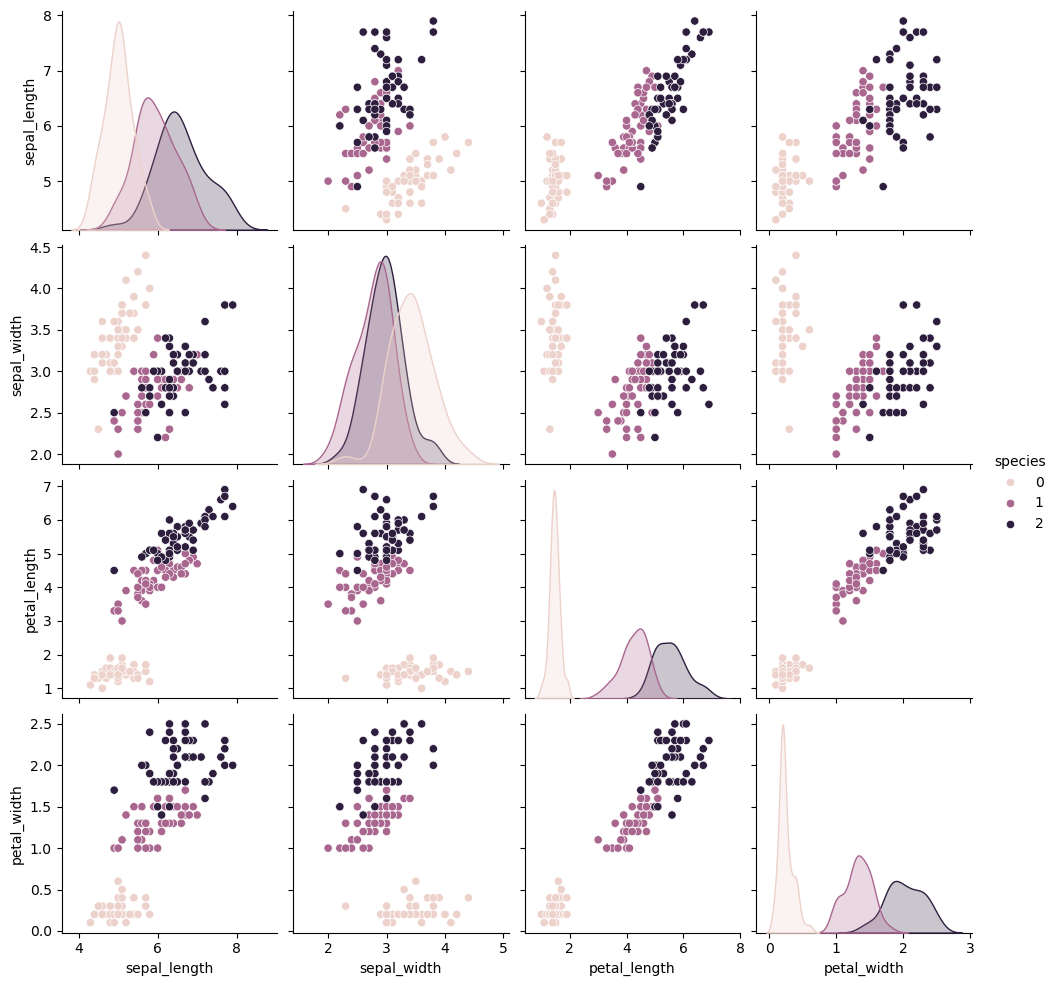

I can observe:
- Strong differences between setosa and the other two species.
- Quite clear differenciation between versicolor and virginica.
- Most differenciating attribute between virginica and versicolor is petal_width.



In [5]:
sns.pairplot(iris, hue='species')               # Plot Correlation features
plt.plot()
plt.show()
print('''I can observe:
- Strong differences between setosa and the other two species.
- Quite clear differenciation between versicolor and virginica.
- Most differenciating attribute between virginica and versicolor is petal_width.
''')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data separation
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42, test_size=0.33)

# Algorithm selection
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                              random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              class_weight=None)

# Chapter 6. Machine Learning - Unsupervised